<a href="https://colab.research.google.com/github/Dee-Olulo/Coupon_ML_Prediction/blob/master/Machine_Learning_Coupon_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Coupon Recommendation System Using User Behavior Data**








# **Project Description**
 * This project focuses on building a machine learning model to predict whether a user will accept a coupon based on several factors, such as weather, passenger information, time of day, and more. The dataset is drawn from an in-vehicle environment where recommendations are offered to users, and the goal is to make predictions that could improve coupon targeting for businesses.

## **Data Understanding**
* The dataset used for this project is the In-Vehicle Coupon Recommendation dataset. It contains information about 12,684 users who were offered various types of coupons while driving. The dataset includes a variety of features related to user behavior and conditions in which the coupons were presented. Each row represents one instance of a coupon being presented, and the target variable (Y) indicates whether the user accepted the coupon or not.

**Key Features:**

● destination: Where the user is going (e.g., No Urgent Place, Work).

● passanger: Who the user is traveling with (e.g., Alone, Friend(s)).

● weather: The weather condition when the coupon was offered (e.g., Sunny, Rainy).

● temperature: The outside temperature in Fahrenheit.

● time: The time of day when the coupon was presented (e.g., 10AM, 2PM).

● coupon: The type of coupon offered (e.g., Coffee House, Restaurant(<20), etc.).

● expiration: The expiration time for the coupon (e.g., 2 hours, 1 day).

● has_children: Whether the user has children or not.

● Bar, CoffeeHouse, CarryAway, Restaurant: How often the user visits these establishments.

● direction_same: Whether the user is heading in the same direction as the coupon destination.

● Y: Target variable (1 for accepting the coupon, 0 for rejecting it).

**Target Variable:**

● Y: Indicates whether the coupon was accepted (1) or rejected (0).


## **Data Loading and Preview**




* Before starting the analysis, it was important to set up a good set of tools. This included numpy and pandas for data handling, matplotlib and seaborn for creating visuals, and various features from sklearn for data processing, machine learning, and evaluating performance.

In [1]:
from google.colab import drive
drive.mount('/content/drive')#Mount the drive to the colab env to acess files stored in the drive

Mounted at /content/drive


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
#loading the data
df = pd.read_csv('/content/drive/MyDrive/in-vehicle-coupon-recommendation.csv')

In [4]:
#view the first five rows of the data
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
#view the last five columns of the data
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [6]:
#dimension of the data
df.shape

(12684, 26)

- The data consists of 12684 rows and 26 columns.

In [7]:
# getting the column names of the data
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [8]:
# summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

- The DataFrame contains a total of 12,684 entries with 26 columns.
- Most columns have 12,684 non-null values, indicating they are complete.
- The majority of the data types are categorical (object), with a few numerical (int64) variables.

- Checked for unique values in each column in the dataframe.

In [9]:
for col in df. columns:
  print(df[col].value_counts(), '/n')

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64 /n
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64 /n
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64 /n
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64 /n
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64 /n
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64 /n
expiration
1d    7091
2h    5593
Name: count, dtype: int64 /n
gender
Female    6511
Male      6173
Name: count, dtype: int64 /n
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64 /n
maritalStatus
Married partner      5100
Single

- All the columns contain categorical values with majority having the object datatype and few numerical columns.

In [10]:
# checking the percentage of missing  values
df.isnull().sum()/len(df)*100

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
time,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000


- Most of the columns do not have missing values. However the 'car' column contains a huge percentage of missing values.This column was dropped because imputing values would increase the risk of inaccuracies.
- Other columns that contain null avlues are; Bar, CoffeeHouse, carryAway, RestaurantLessThan20 and Restaurant20To50. Since these columns had a small percentage of missing values, they were handled through imputation.

In [11]:
# dropping the car column
df.drop('car', axis=1, inplace = True)

In [12]:
#list of columns with null values
null_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in null_cols:
  print(col, df[col].value_counts()) #count of unique entries in each column


Bar Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
CarryAway CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
RestaurantLessThan20 RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Restaurant20To50 Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


- Since all the columns with missing values are categorical, the missing values were imputed using the mode.

In [13]:
#replacing null values in the categoricals columns with the mode
for col in null_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

- Checked for unique values in all the categorical columns to confirm whether some cleaning was necessary.

In [14]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in column '{col}': {df[col].unique()}") #getting unique values in all columns of object data type.

Unique values in column 'destination': ['No Urgent Place' 'Home' 'Work']
Unique values in column 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in column 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in column 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in column 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in column 'expiration': ['1d' '2h']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in column 'maritalStatus': ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in column 'education': ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in column 'occupation': ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Libra

- For uniformity, better understanding  and reduction of bulkiness of the values the following values in their respective columns were cleaned.

In [15]:
#cleaning the columns
df['age'] = df['age'].replace({'50plus': '50+',
                        'below21': '<21'})
df['maritalStatus'] = df['maritalStatus'].replace({
    'Unmarried partner': 'Unmarried',
    'Married partner': 'Married'
})
df['income'] = df['income'].replace({
    'Less than $12500': '< $12500',
    '$100000 or More': '$100,000+'
})
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    df[col] = df[col].replace({
        'less1': '<1',     # Replace 'less1' with '<1'
        '1~3': '1-3',      # Replace '1~3' with '1-3'
        '4~8': '4-8',      # Replace '4~8' with '4-8'
        'gt8': '>8'        # Replace 'gt8' with '>8'
    })
df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried,...,never,1-3,4-8,1-3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried,...,never,1-3,4-8,1-3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried,...,never,1-3,4-8,1-3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried,...,never,1-3,4-8,1-3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried,...,never,1-3,4-8,1-3,1,1,0,0,1,0


- Checked of unique values in the numerical columns. The entries were uniform so no further cleaning was needed.

In [16]:
for col in df.select_dtypes(include='number').columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'temperature': [55 80 30]
Unique values in column 'has_children': [1 0]
Unique values in column 'toCoupon_GEQ5min': [1]
Unique values in column 'toCoupon_GEQ15min': [0 1]
Unique values in column 'toCoupon_GEQ25min': [0 1]
Unique values in column 'direction_same': [0 1]
Unique values in column 'direction_opp': [1 0]
Unique values in column 'Y': [1 0]


- Explored the temperature column further by viewing its statistics.

In [17]:
df.temperature.describe().T

,temperature
count,12684.000000
mean,63.301798
std,19.154486
min,30.000000
25%,55.000000
50%,80.000000
75%,80.000000
max,80.000000


- Discovered that there were some events where the temperature was 30 farhrenheit and the weather was sunny at the same time. 30 farhrenheit is equivalent to -1 degree celcius.
-From further research it   is possible for the temperature to be -1°C (30.2°F) and sunny at the same time. Low temperatures don’t prevent the sun from shining. SO the entries will remain as they are.

In [18]:
# get the data where temp is 30 and weather is sunny
# Filter the DataFrame
filtered_df = df[(df['temperature'] == 30) & (df['weather'] == 'Sunny')]

# len of filtered_df
filtered_df



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
6586,No Urgent Place,Friend(s),Sunny,30,10PM,Coffee House,1d,Male,36,Married,...,<1,<1,<1,never,1,0,0,0,1,0
6601,Work,Alone,Sunny,30,7AM,Bar,1d,Male,36,Married,...,<1,<1,<1,never,1,0,0,0,1,0
6608,No Urgent Place,Friend(s),Sunny,30,10PM,Coffee House,1d,Male,36,Married,...,never,<1,1-3,1-3,1,0,0,0,1,0
6623,Work,Alone,Sunny,30,7AM,Bar,1d,Male,36,Married,...,never,<1,1-3,1-3,1,0,0,0,1,0
6628,No Urgent Place,Friend(s),Sunny,30,10PM,Coffee House,1d,Male,26,Single,...,1-3,1-3,1-3,<1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,never,1-3,4-8,1-3,1,0,0,0,1,1
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1-3,4-8,1-3,1,0,0,0,1,1
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1-3,4-8,1-3,1,0,0,0,1,0
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1-3,4-8,1-3,1,1,1,0,1,1


## **EDA**

### **Univariate Analysis**

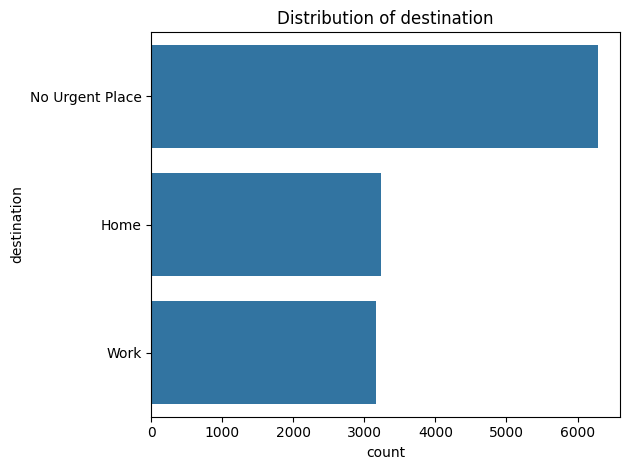

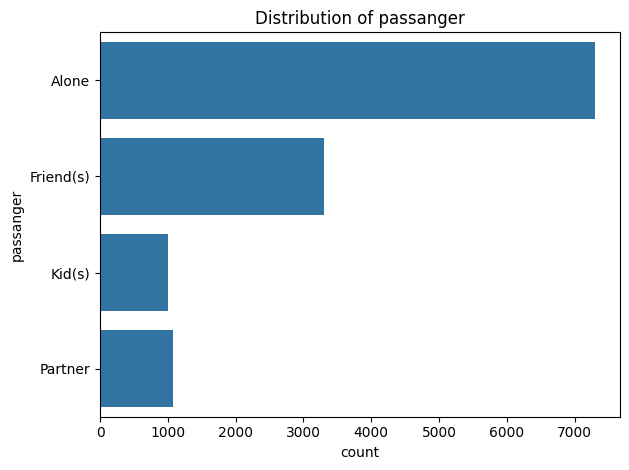

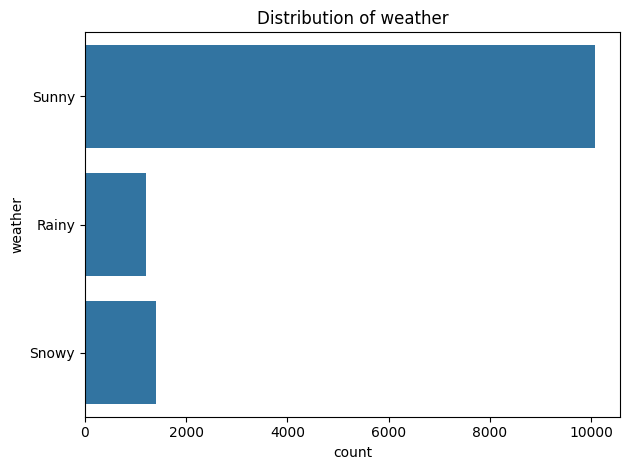

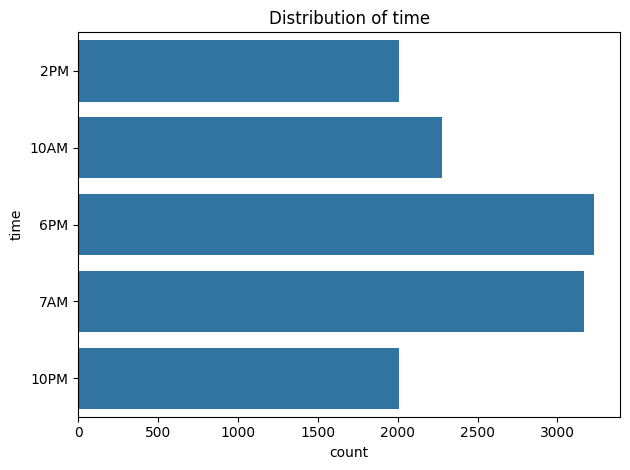

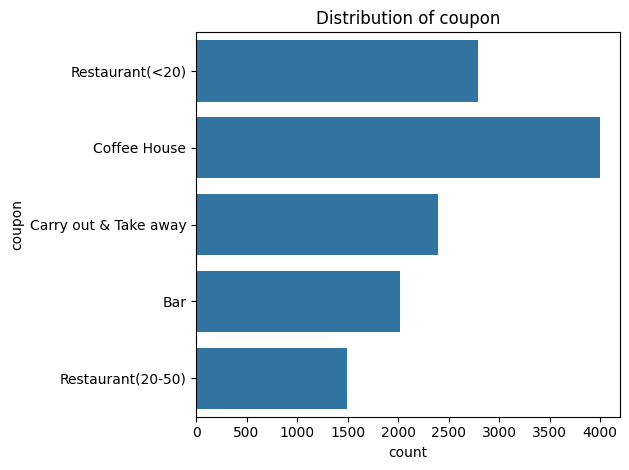

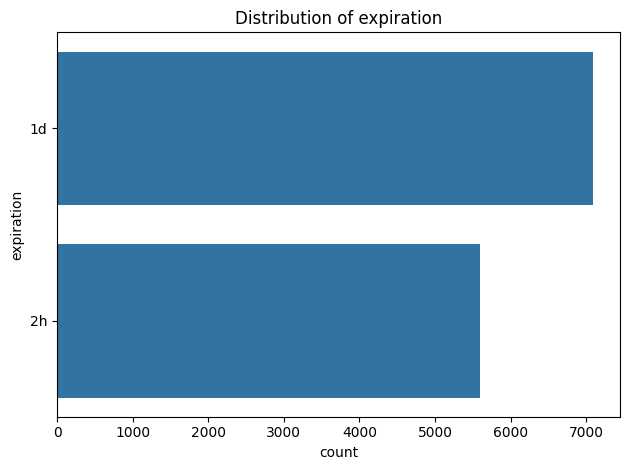

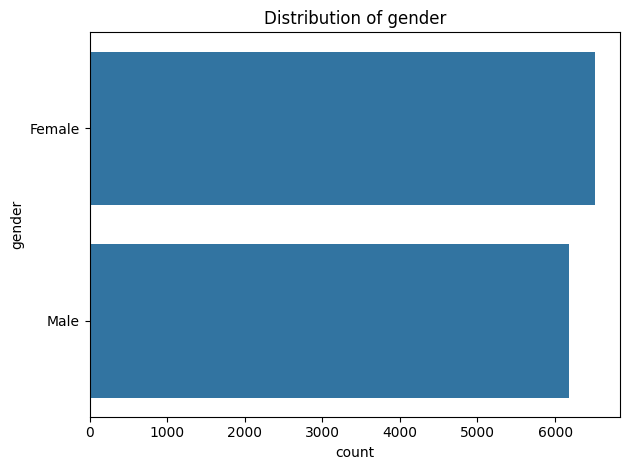

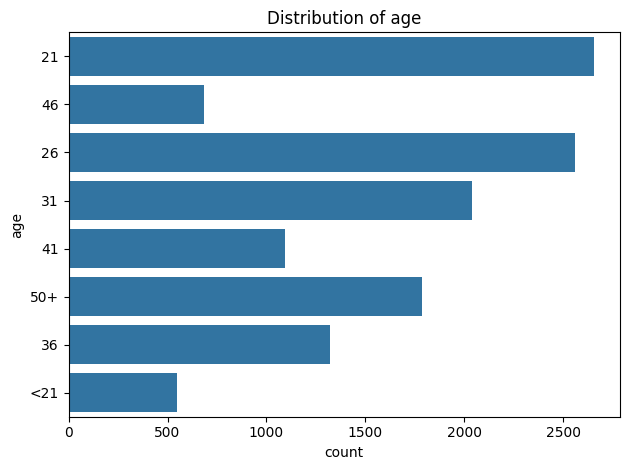

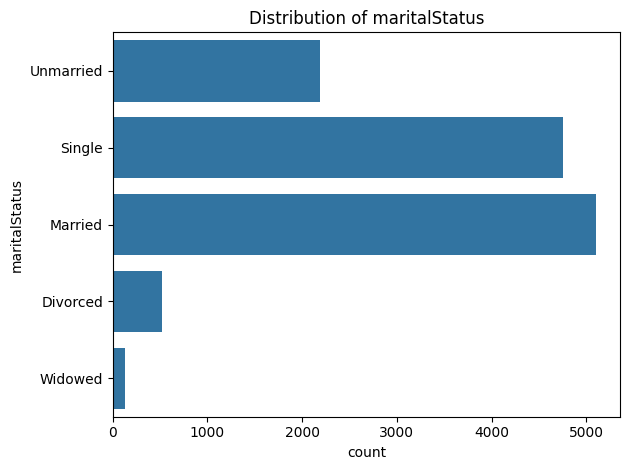

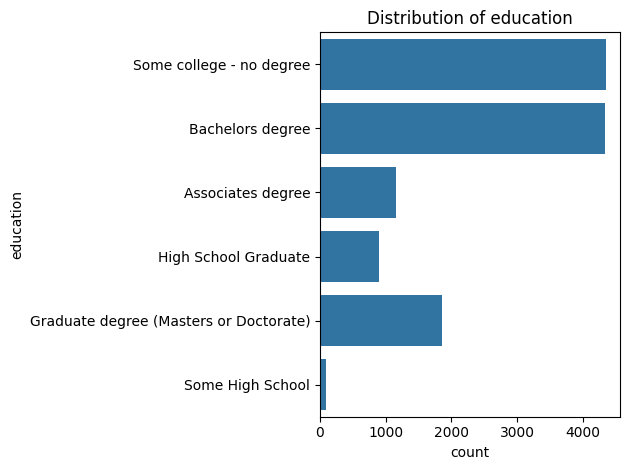

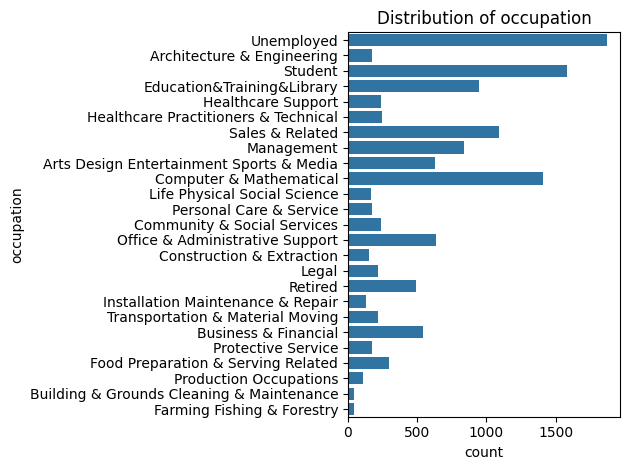

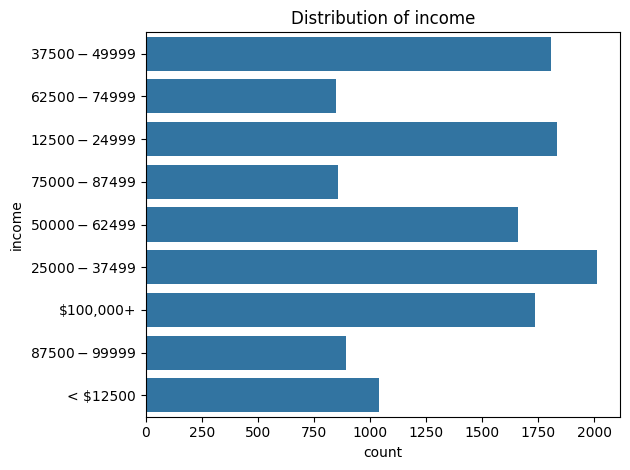

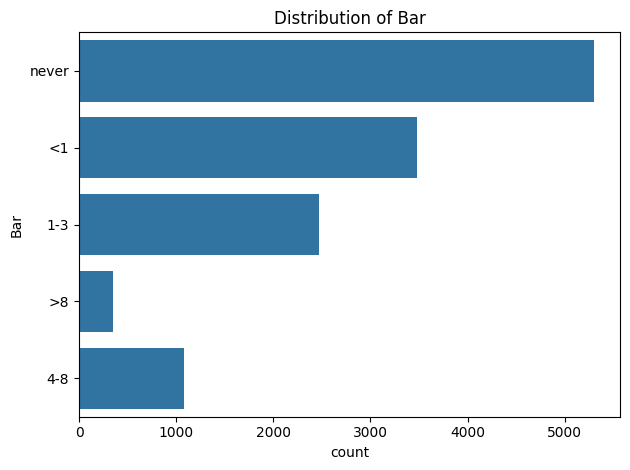

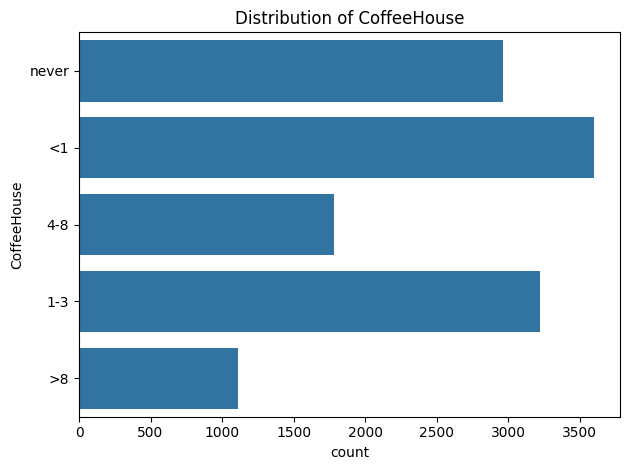

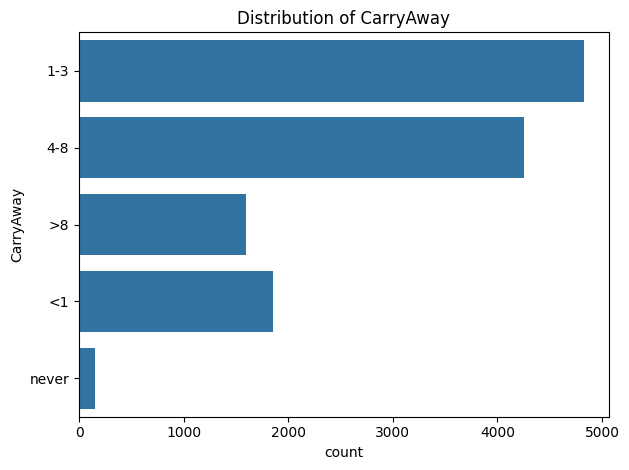

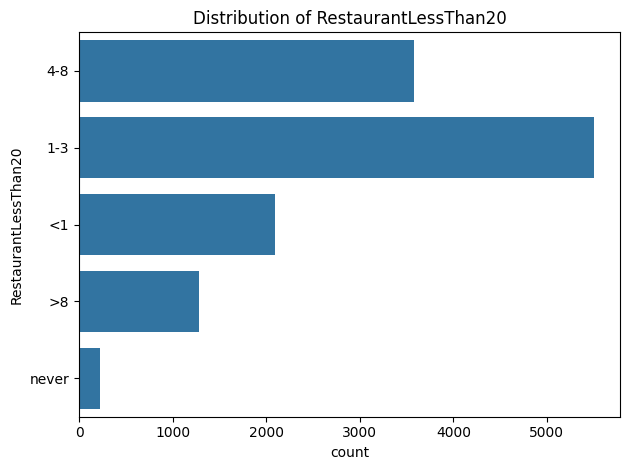

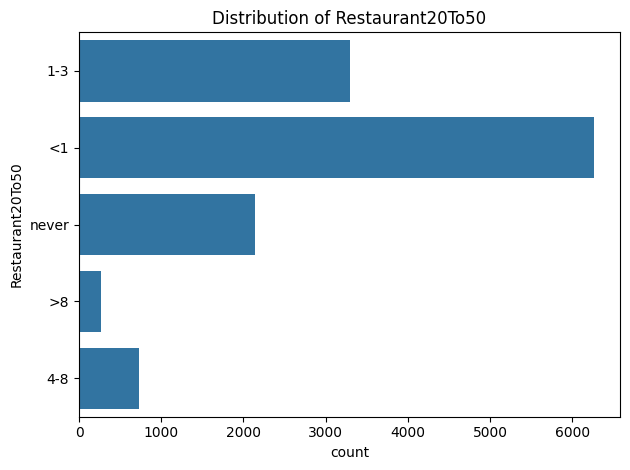

<Figure size 640x480 with 0 Axes>

In [ ]:
for col in df.select_dtypes(include='object').columns:
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


**Observations**
- Most passengers that boarded  had no urgent place to go.
- A high percentage of passengers were travelling alone.
- The weather was suuny during most of the travel time.
- Most of the passengers wer between the age group of 20-30 years.
- The marital status of most passengers was 'Married'.
- The income of the passengers varied over a wide range .There was no significant variation in the passengers' income that were on board.
- A high percentage of passengers had never visited the bar.
- Most passengers appear to have a moderate coffee consumption level,


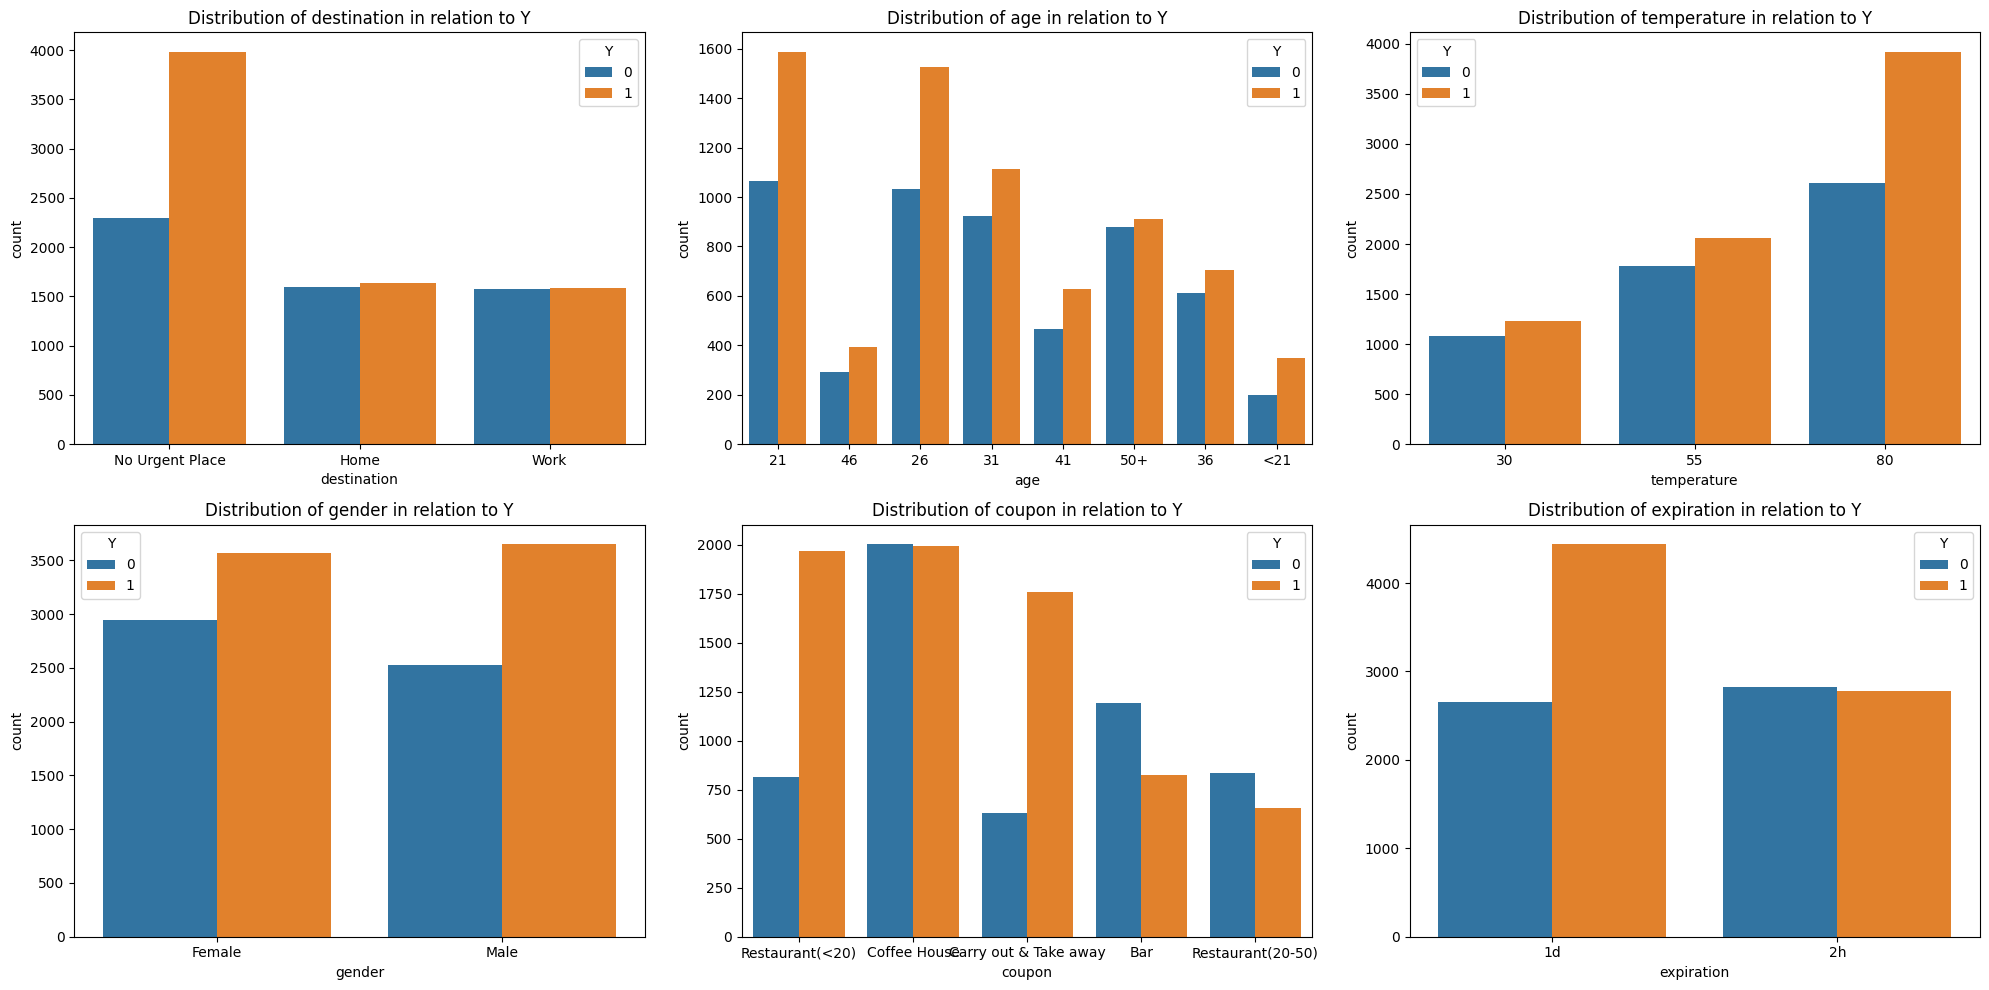

In [ ]:
# distribution of the y in relation to destination
# Define the columns to plot
cols = ['destination', 'age', 'temperature', 'gender', 'coupon', 'expiration']

# Set the number of columns for the grid
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten to easily iterate

# Loop through columns and plot
for i, col in enumerate(cols):
    sns.countplot(x=df[col], hue='Y', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} in relation to Y')

# Hide any unused axes
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Observations**
- Passengers traveling to "No Urgent Place" are the most frequent, indicating a higher likelihood of coupon acceptance in scenarios where they have no specific destination. This may suggest a tendency to explore options when they are not in a hurry.
The counts for "Home" and "Work" are lower, but there is a noticeable difference in coupon acceptance between the two. Passengers going "Home" seem to be more likely to accept coupons than those heading to "Work," indicating that after a workday, passengers may be more inclined to consider promotional offers.

- Younger passengers (especially those in the <21 age group) appear to have lower acceptance rates for coupons compared to those in the 21-31 age groups. This may suggest that older, more established individuals are more responsive to coupon offers.

- The trend indicates that as the temperature increases, the number of coupon acceptances (1) also increases, suggesting that passengers are more likely to accept coupons in warmer weather.
This could imply that people are more likely to go out and dine or shop when it's warmer, thus being more receptive to coupons

- Males show a slightly higher acceptance rate for coupons compared to females. This might suggest that male passengers are more responsive to promotions or incentives than their female counterparts.
Overall, the distribution remains fairly balanced, indicating a similar inclination towards accepting or rejecting coupons across genders.

- The "Restaurant(<20)" coupon shows the highest acceptance count, indicating its effectiveness in enticing passengers.
Other coupon types like "Carry out & Take away" and coffeeHouse also attract a notable number of acceptances, suggesting that price-sensitive offers resonate well with customers.
The "Restaurant(20 - 50)" and "Bar" categories have more rejections, indicating that these offers might not appeal to as many passengers.

- Coupons with a longer expiration time (24 hours/1d) have a higher count of accepted coupons.

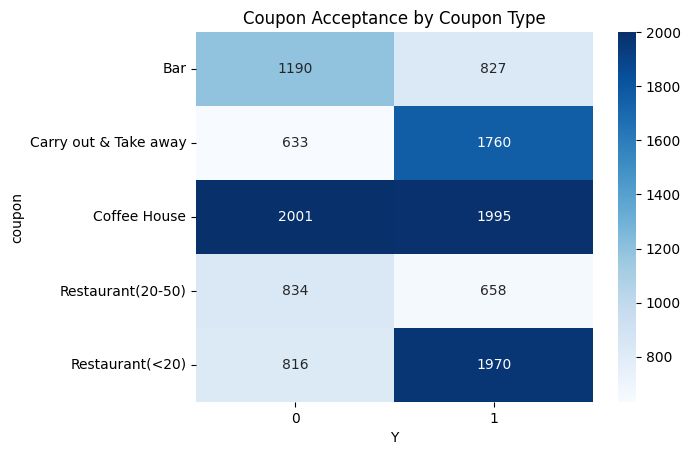

In [ ]:
coupon_acceptance = pd.crosstab(df['coupon'], df['Y'])
sns.heatmap(coupon_acceptance, annot=True, cmap='Blues', fmt='d')
plt.title('Coupon Acceptance by Coupon Type')
plt.show()


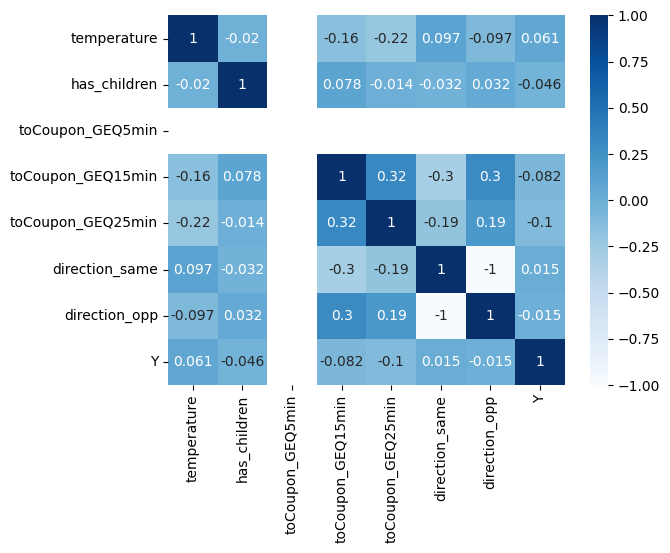

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues')
plt.show()

## Data Preprocessing

- The first step was to define our target vriable which was column 'Y'. This column has two entries; 0 and 1 . 0 implies that the passenger did'nt receive a coupon while 1 implies that the passenger received a coupon.
- All the remaining columns were assigned to the variable X.
- Splitted the data into training sets and tests sets.
- Preprocessing steps were done separately on the train and test sets to avoid data leakage.
- Transformed all the columns to numerical format so as as to run the ml algorithm models effieciently.
- Scaled the train and test sets so that all features contribute equally to the ml models.

In [19]:
# define X and y variables
X = df.drop('Y', axis=1)
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# One hot encoding the train nad test data separately using the slearn library
ohe = OneHotEncoder(sparse_output=False) # set sparse_output to False
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)
# tranform the X_train and X_test to dataframe
X_train = pd.DataFrame(X_train, columns=ohe.get_feature_names_out(X.columns))
X_test = pd.DataFrame(X_test, columns=ohe.get_feature_names_out(X.columns))


In [20]:
#scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Saved the new datasets used for modelling in csv files.

In [21]:
# tranform the X_train and X_test to dataframe
X_train = pd.DataFrame(X_train, columns=ohe.get_feature_names_out(X.columns))
X_test = pd.DataFrame(X_test, columns=ohe.get_feature_names_out(X.columns))
X_train.to_csv('cleaned_traindata.csv', index=False)
X_test.to_csv('cleaned_testdata.csv', index=False)

## **Modelling**
- Logistic Regression was used a the baseline model due to its simplicity, ease of interpretation, it also serves as a reliable starting point for evaluating model performance.
- Other Ml algorithms used were Decicion Trees and RandomForestClssifier.
- For each model, a classification report was generated to show how the model was performing based on all the metrices of evaluation used for these algorithms.

**Metric of Evaluation**

- **Recall**
:Our goal is to maximise the coupon usage ie.to maximize true positives (correctly identifying customers who will use a coupon)

### **Logistic Regression**

In [22]:
# Baseline model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print("Train Classification Report\n",classification_report(y_train, y_pred))
y_predr1 = lr.predict(X_test)
print("Test Classification Report\n",classification_report(y_test, y_predr1))

Train Classification Report
               precision    recall  f1-score   support

           0       0.66      0.58      0.62      4346
           1       0.71      0.78      0.74      5801

    accuracy                           0.69     10147
   macro avg       0.69      0.68      0.68     10147
weighted avg       0.69      0.69      0.69     10147

Test Classification Report
               precision    recall  f1-score   support

           0       0.67      0.57      0.62      1128
           1       0.69      0.78      0.73      1409

    accuracy                           0.69      2537
   macro avg       0.68      0.67      0.68      2537
weighted avg       0.68      0.69      0.68      2537



Recall for Class 0 (Non-Users of the Coupon):

Training Set: 0.58
Test Set: 0.57

This recall score indicates that the model is correctly identifying about 57-58% of actual non-users as non-users. In other words, there’s a significant portion of non-users (false negatives) that the model incorrectly predicts as coupon users.

Recall for Class 1 (Users of the Coupon):

Training Set: 0.78
Test Set: 0.78

The model correctly identifies about 78% of actual coupon users as users, which is a relatively good recall. This means the model is better at identifying those who will use the coupon, leading to fewer missed opportunities (false negatives) among coupon users.

### **Decision Trees**

In [ ]:
#Decision Trees
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred2 = tree.predict(X_train)
print("Train Classification Report\n",classification_report(y_train, y_pred2))
y_pred3 = tree.predict(X_test)
print("Test Classification Report\n",classification_report(y_test, y_pred3))

Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4346
           1       1.00      1.00      1.00      5801

    accuracy                           1.00     10147
   macro avg       1.00      1.00      1.00     10147
weighted avg       1.00      1.00      1.00     10147

Test Classification Report
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      1128
           1       0.71      0.73      0.72      1409

    accuracy                           0.69      2537
   macro avg       0.68      0.68      0.68      2537
weighted avg       0.68      0.69      0.68      2537



- The model achieved a precision, recall, and F1-score of 1.00 for both classes on the training set. This perfect accuracy (1.00) indicates the model memorized the training data, fitting it exactly.
- On the test set, the accuracy dropped to 0.69, with similar drops in precision, recall, and F1-score.
- The drastic difference between the training and test set metrics highlights that the decision tree model is highly overfit to the training data, struggling to generalize to unseen data.

### **RandomForestClassifier**

In [ ]:
# Randomforestclassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_train)
print("Train Classification Report\n",classification_report(y_train, y_pred4))
y_pred5 = rf.predict(X_test)
print("Train Classification Report\n",classification_report(y_test, y_pred5))


Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4346
           1       1.00      1.00      1.00      5801

    accuracy                           1.00     10147
   macro avg       1.00      1.00      1.00     10147
weighted avg       1.00      1.00      1.00     10147

Train Classification Report
               precision    recall  f1-score   support

           0       0.74      0.64      0.69      1128
           1       0.74      0.82      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537



- While the test set performance is not as high as the
training set, it suggests the model is generalizing better than a single decision tree. However, the difference in scores between the training and test sets still suggests overfitting.

## **Fine tuning the models**

-  Fine-tuned the models to improve their performance by optimizing hyperparameters, which can reduce overfitting or underfitting, and ultimately produce more reliable results on new, unseen data

In [ ]:
#Finetuning the models
# Parameter grid for GridSearchCV
param_grid = {
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Penalty types
    'solver': ['liblinear', 'saga']  # Solver for optimization
}
grid = GridSearchCV(lr, param_grid, cv=5, scoring= 'precision')
grid.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid.best_params_)
# Predict on the test set using the best model
best_logreg = grid.best_estimator_
y_predt = best_logreg.predict(X_test)
y_pred0 = best_logreg.predict(X_train)

# classification report for both train and test data
print("Train Classification Report\n", classification_report(y_train, y_pred0))
print("Test Classification Report\n", classification_report(y_test, y_predt))


Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Train Classification Report
               precision    recall  f1-score   support

           0       0.65      0.59      0.62      4346
           1       0.71      0.76      0.74      5801

    accuracy                           0.69     10147
   macro avg       0.68      0.68      0.68     10147
weighted avg       0.69      0.69      0.69     10147

Test Classification Report
               precision    recall  f1-score   support

           0       0.66      0.57      0.62      1128
           1       0.69      0.77      0.73      1409

    accuracy                           0.68      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.68      0.68      0.68      2537



- Good Recall for Users: The model has a high recall for class 1 (coupon users), capturing about 77% of actual coupon users in the test set, which can help increase coupon redemption rates.
- Moderate Recall for Non-Users: The model’s recall for non-users is moderate, so it may misclassify some non-users as users.
- There was no much improvement from the baseline model .
- Note that the model only perform as good as the parameters fed into the dictionary grid.

In [ ]:
#random forest using gridsearchcv
param_grid = {'n_estimators':[100, 10],
              'max_depth': [10, 20, 30],
              'min_samples_split': [10, 20],
              'min_samples_leaf': [10, 20],
              'max_features': ['sqrt', 'log2', None],
              'bootstrap': [True, False],
              'class_weight': ['balanced', 'balanced_subsample', None],
              'random_state': [42]
              }
grid = GridSearchCV(rf, param_grid, cv=5, scoring= 'precision')
grid.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred1 = best_rf.predict(X_train)
print(classification_report(y_train, y_pred1))
print(classification_report(y_test, y_pred))



Best parameters for Random Forest: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 42}
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      4346
           1       0.85      0.83      0.84      5801

    accuracy                           0.82     10147
   macro avg       0.81      0.82      0.81     10147
weighted avg       0.82      0.82      0.82     10147

              precision    recall  f1-score   support

           0       0.68      0.69      0.69      1128
           1       0.75      0.74      0.75      1409

    accuracy                           0.72      2537
   macro avg       0.72      0.72      0.72      2537
weighted avg       0.72      0.72      0.72      2537



- The model shows great improvemnt from the previous RandomForestClassifier model which was highly overfitting.
- Although there is still a huge gap between the recall metrics of the train and test sets which implies that the model could still be overfitting.

In [ ]:
# Define the parameter grid
# DecisionTree with gridserchcv
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}
grid = GridSearchCV(tree, param_grid, cv=5, scoring= 'precision')
grid.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid.best_params_)
#classification report for train and test data
best_tree = grid.best_estimator_
y_pred2 = best_tree.predict(X_train)
y_pred3 = best_tree.predict(X_test)

print('Train classificatio Report',classification_report(y_train, y_pred2))
print('Test classification Report',classification_report(y_test, y_pred3))

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}
Train classificatio Report               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4346
           1       0.97      0.89      0.93      5801

    accuracy                           0.92     10147
   macro avg       0.92      0.93      0.92     10147
weighted avg       0.93      0.92      0.92     10147

Test classification Report               precision    recall  f1-score   support

           0       0.64      0.69      0.66      1128
           1       0.73      0.68      0.71      1409

    accuracy                           0.69      2537
   macro avg       0.68      0.69      0.68      2537
weighted avg       0.69      0.69      0.69      2537



- The model did not show much great improvement from the hyperparameter tuning. The Model is still highly overfitting, which suggests that the model is learning the training data too well with minimal generalisation.

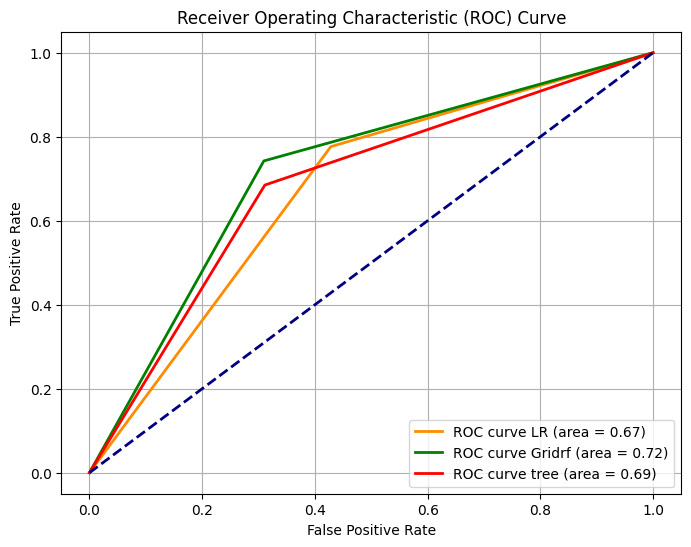

In [ ]:
# plotting the AUC and ROC curve
#compute the ROC curve and roc_auc score
fpr, tpr, thresholds = roc_curve(y_test, y_predr1)
roc_auc = roc_auc_score(y_test, y_predr1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred3)
roc_auc3 = roc_auc_score(y_test, y_pred3)

#plotting the curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve LR (area = {roc_auc:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'ROC curve Gridrf (area = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'ROC curve tree (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


##**Model Selection**

- The approach used in selecting the final model was be comparing the performance between the train and test sets of data.
- First step was looking at the models that showed better generalisation between the train and test set. Meaning the gap between the train and test metrics that exhibited the least difference had the highest priority.
- Metrics that exhibited a range of 90% and above suggests overfitting therefore these models were not considered.
- From the ROC curve above, it shows that The randomforest claasifier is performing the best due to its large area under the curve. However this model was not selected because due to the huge difference in the train and test metrics.
- Finally settled on Logistic Regression (Baseline) as the best performing model due its its great generalisation .The metrices in the training and test set also exhibit very minimal difference which is good.

<Figure size 800x600 with 0 Axes>

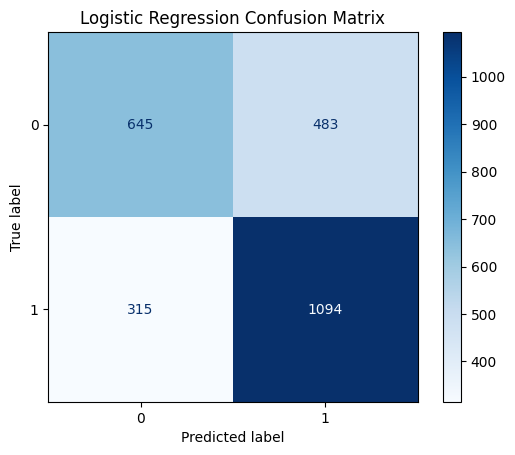

In [ ]:
# Plotting confusionmatrixDisplay
# Logistic regression
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_predr1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show();




**Observations**
- True Negatives (TN): 645 - The model correctly predicted that 645 customers would not use the coupon.
- False Positives (FP): 483 - The model incorrectly predicted that 483 customers would use the coupon when they actually did not.
- False Negatives (FN): 315 - The model incorrectly predicted that 315 customers would not use the coupon when they actually did.
- True Positives (TP): 1094 - The model correctly predicted that 1094 customers would use the coupon.

**Analysis of the Results:**

- Strengths: The model has a relatively high recall, indicating that it is reasonably good at identifying customers who will use the coupon.
-Limitations: There is still room for improvement. Approximately 22% of customers who used the coupon were missed by the model.

## Conlusion
- The Logistic Regression Baseline model provides valuable insights for targeting potential coupon users effectively, helping drive customer engagement. It’s a robust initial model, though further refinements could help achieve even greater predictive recall and precision. These insights can support decision-making around targeted marketing strategies, ultimately aiding in maximizing coupon acceptance rates while minimizing unnecessary outreach.